<a href="https://colab.research.google.com/github/jsroa15/KKBOX/blob/main/Members_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Members data

The main idea here is to explore the members dataset.

**Exploratory Data Analysis**

1.  Load data
2.  General statistics
3.  Data Visualization
4.  Data Cleaning
5.  Fixing formats


# **Explorator Data Analysis**

## 1. Load Data

In [ ]:
#Import

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Loading data

members=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/members_v3.csv')

## 2. General Statistics

In [ ]:
#Exploring data

members.head()


,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [ ]:
#Information from dataset

members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   city                    int64 
 2   bd                      int64 
 3   gender                  object
 4   registered_via          int64 
 5   registration_init_time  int64 
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


In [ ]:
#Summary Statistics

round(members.describe())

,city,bd,registered_via,registration_init_time
count,6769473.0,6769473.0,6769473.0,6769473.0
mean,4.0,10.0,5.0,20145176.0
std,5.0,18.0,2.0,23186.0
min,1.0,-7168.0,-1.0,20040326.0
25%,1.0,0.0,4.0,20140422.0
50%,1.0,0.0,4.0,20151010.0
75%,4.0,21.0,7.0,20160604.0
max,22.0,2016.0,19.0,20170429.0


In this case the information provided from the above is not really useful, because most all the features are categorical and must be correctly encoded.

In [ ]:
# Missing values

pd.DataFrame({'%missing_value':round(members.isna().sum()/members.shape[0]*100,2)})

,%missing_value
msno,0.00
city,0.00
bd,0.00
gender,65.43
registered_via,0.00
registration_init_time,0.00


We have more than 50% of missing data in feature ```gender``` in later steps we are going to replace missing values wiht another category that replace missing values.

In [ ]:
#Duplicate records on msno

print('\nnumber of unique counts per msno: ',members.msno.nunique())


number of unique counts per msno:  6769473


There's no duplicates on the dataset.

## 3. Data Visualization

In [ ]:
members.columns

categorical=[x for x in members.columns if x not in ['bd','registration_init_time','msno']]

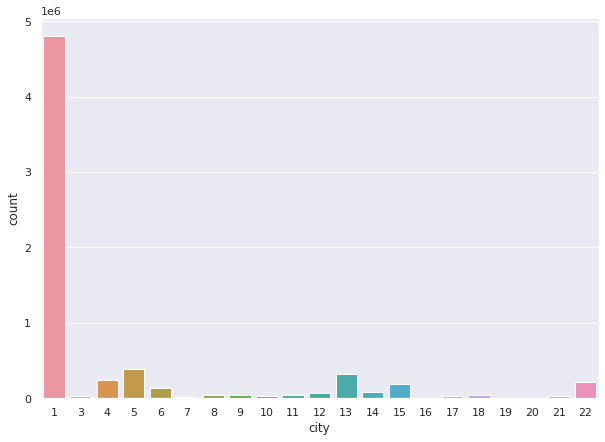

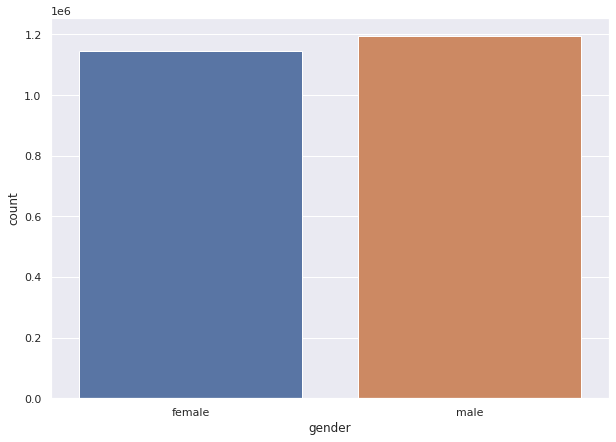

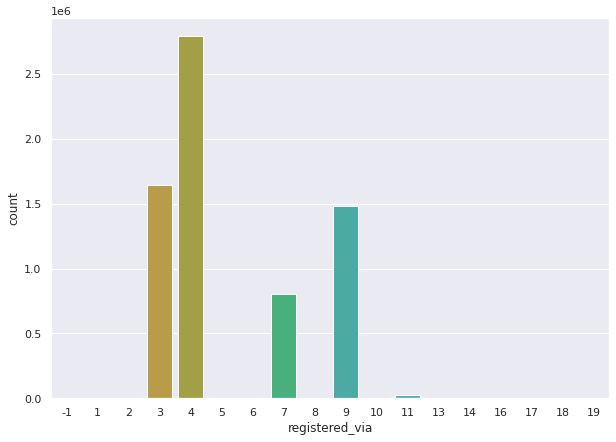

In [ ]:
sns.set_theme(style="darkgrid")

for i in categorical:
  plt.figure(figsize=(10,7))
  sns.countplot(data=members,x=i,)
  #plt.show()

From the above we can see that most of the suscription occur in city #1, although we have more than 60% of missing data in gender, the proportion of men and women is almost the same. Finally, in registered_via we can observe that most of the subscriptions occur in categories 3,4,7, and 9.

Now let's explore the age of the users:

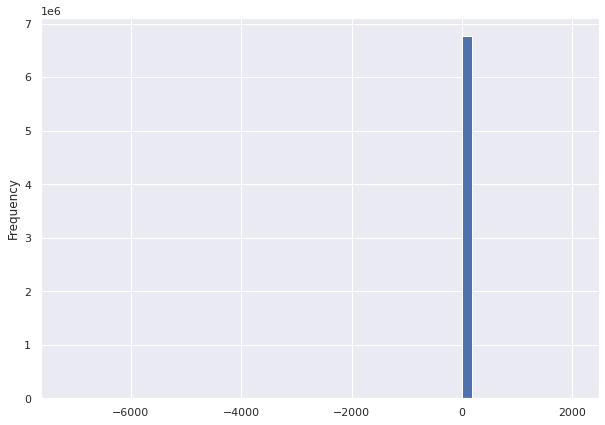

In [ ]:
plt.figure(figsize=(10,7))
members.bd.plot(kind='hist',bins=50)


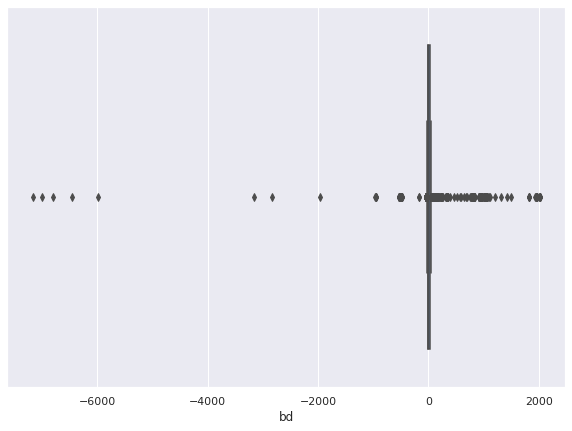

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=members,x='bd')

We can see that feature ```bd``` has a big amount of outliers. We have to perform feature engineering to fix that later.

## 4. Data Cleaning

In [ ]:
#Checking duplicates

print('Number of records in dataset: ',members.shape[0])
print('Number of unique records: ',members.msno.nunique())

Number of records in dataset:  6769473
Number of unique records:  6769473


We have no duplicated records in the dataset.

The feature ```gender``` has more than 60% of missing values, it's common to drop features with more than 60% of  missingnes, however, we consider that feature as relevante, so, we are going to replace NaN values with a another category.

In [ ]:
#Replacing missing values in gender

members.gender.fillna('other',inplace=True)

## 5. Fixing formats

In [ ]:
#Changing features format

members.registration_init_time=members.registration_init_time.astype('str')
members.city=members.city.astype('str')
members.registered_via=members.registered_via.astype('str')

members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   city                    object
 2   bd                      int64 
 3   gender                  object
 4   registered_via          object
 5   registration_init_time  object
dtypes: int64(1), object(5)
memory usage: 309.9+ MB


In [ ]:
#Changing date format

members.registration_init_time=pd.to_datetime(members.registration_init_time)

In [ ]:
members.registration_init_time

0         2011-09-11
1         2011-09-14
2         2011-09-15
3         2011-09-15
4         2011-09-15
             ...    
6769468   2015-10-20
6769469   2015-10-20
6769470   2015-10-20
6769471   2015-10-20
6769472   2015-10-21
Name: registration_init_time, Length: 6769473, dtype: datetime64[ns]

In [ ]:

#Exporting df_members

members.to_csv('/content/drive/MyDrive/Colab Notebooks/KKBOX/df_members.csv',index=False)